In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('Downloads\Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
sertosa =df[df['Species'] == 'Iris-setosa']
versicolor =df[df['Species'] =='Iris-versicolor']
virginica =df[df['Species'] =='Iris-virginica']

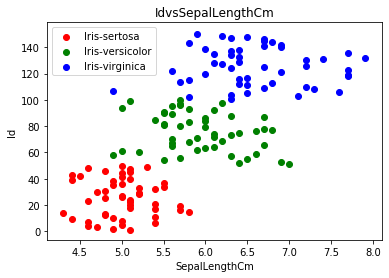

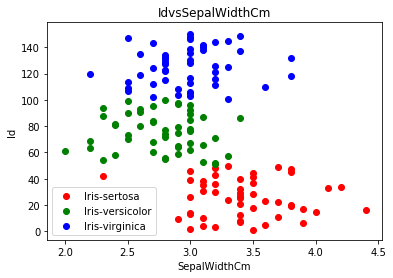

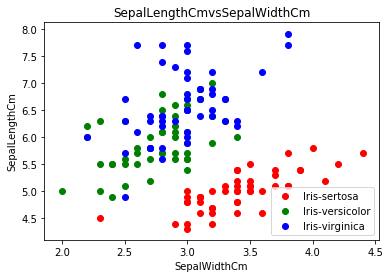

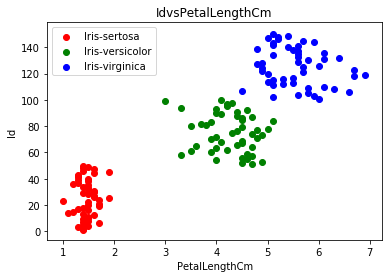

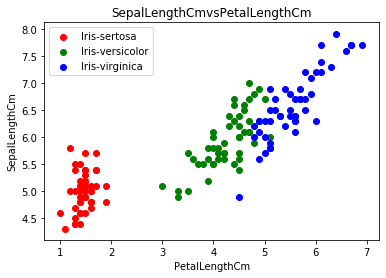

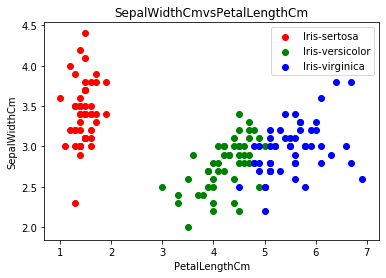

In [13]:
import matplotlib.pyplot as plt
for i in range(4):
    for j in range(i):
        plt.figure()
        plt.scatter(sertosa[df.columns[i]], sertosa[df.columns[j]], color ='r', label='Iris-sertosa')
        plt.scatter(versicolor[df.columns[i]], versicolor[df.columns[j]], color ='g', label='Iris-versicolor')
        plt.scatter(virginica[df.columns[i]], virginica[df.columns[j]], color='b', label='Iris-virginica')
        plt.xlabel(df.columns[i])
        plt.ylabel(df.columns[j])
        plt.title(df.columns[j]+"vs"+df.columns[i])
        plt.legend()
        plt.show()

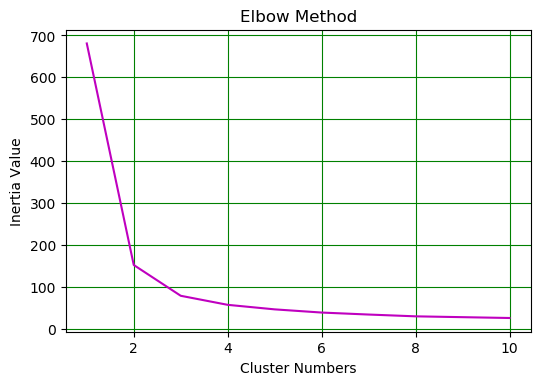

In [14]:
x = df.iloc[:, [1,2,3,4]].values

wcss=[]

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

    
plt.figure(dpi = 100)
plt.plot(range(1,11),wcss,color = 'm')
plt.xlabel('Cluster Numbers')
plt.ylabel('Inertia Value')
plt.title('Elbow Method')
plt.grid(color = 'g')
plt.show()

In [9]:

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
c= kmeans.cluster_centers_
print(c)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


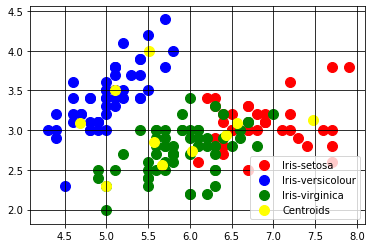

In [15]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.grid(color = 'black')
plt.legend()